In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pymagnet as pm
import numpy as np

## Calculating the field due to a cylinder
Units are always SI, with length in (m), and B, J in (T).

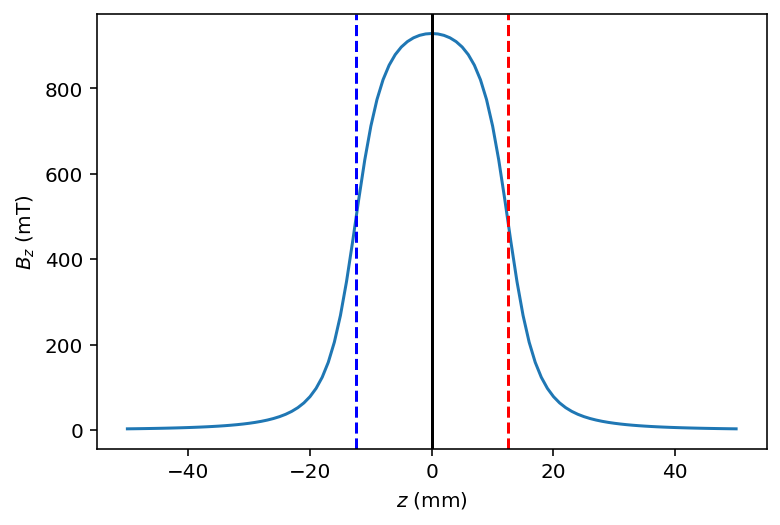

In [2]:
R = 5e-3
L = 25e-3
m_cyl = pm.magnets.Cylinder(radius = R,
                            length = L,
                            Jr = 1.0, # remnant magnetisation in T
                            center=(0.0, 0.0, 0))

pm.plots.plot_1D_field(m_cyl);

Looking at the instantiated magnet:

In [3]:
m_cyl

Cylinder
J: 1.0 (T)
Size: [0.005 0.025] (m)
Center [0. 0. 0.] (m)
Orientation alpha,beta,gamma: [0. 0. 0.]

## Calculating the field due to a Cuboid/Prism

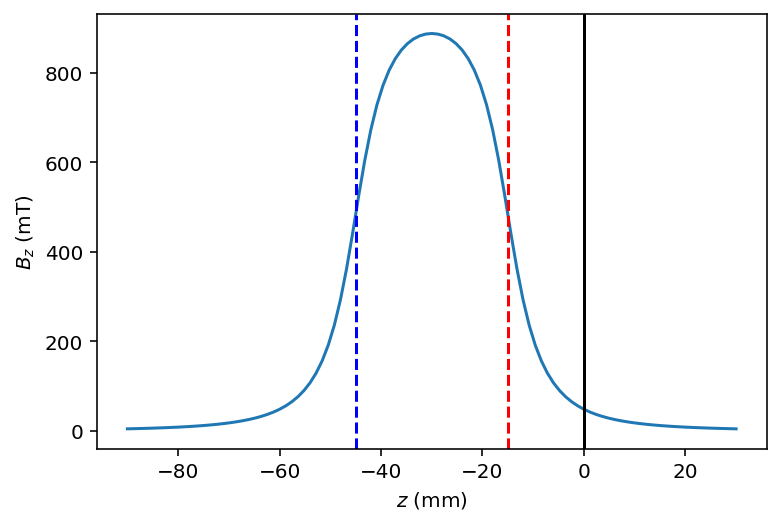

In [4]:
width = 10.0e-3
depth = 2*width
height = 3*width
m_quad = pm.magnets.Prism(width= width,
                          depth = depth,
                          height=height,
                          Jr = 1.0,
                          center=(0.0, 0.0, -height))

pm.plots.plot_1D_field(m_quad)

Masking the field _inside_ the magnet:

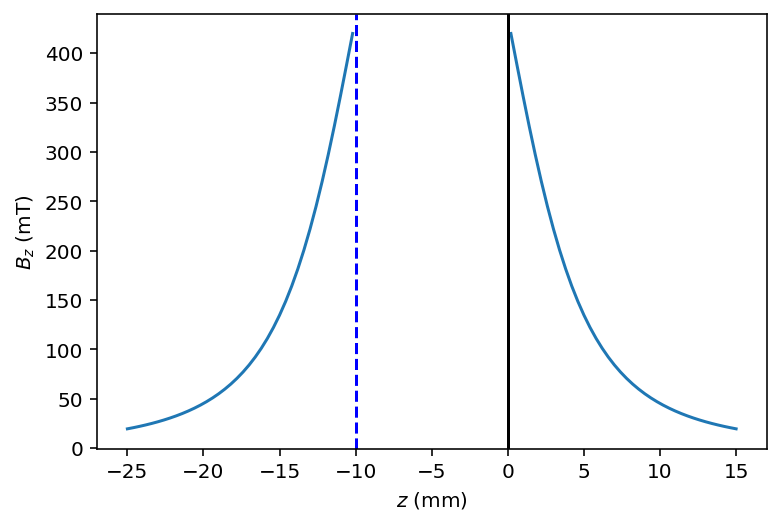

In [5]:
width = 10.0e-3
m_cube = pm.magnets.Cube(width= width,
                         Jr = 1.0,
                         center=(0.0, 0.0, -width/2),
                         mask_magnet = True)

pm.plots.plot_1D_field(m_cube)

Accessing the calculated data:

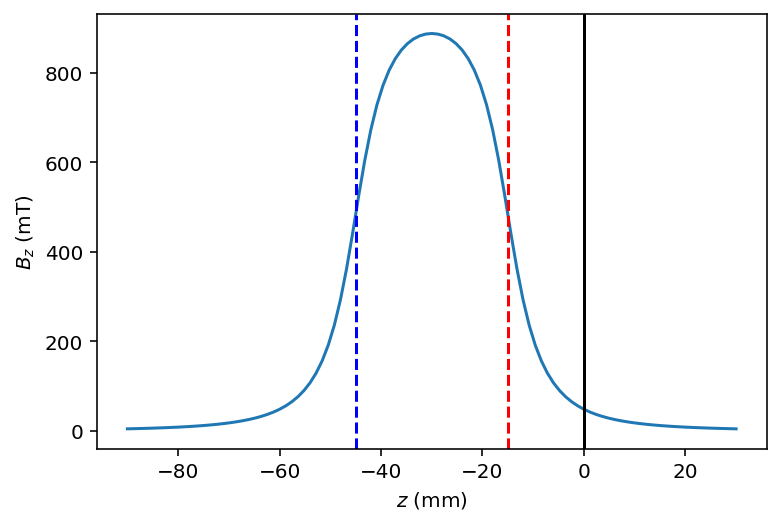

shape of arrays: z:(101,), Bz:(101,)


In [6]:
width = 10.0e-3
depth = 2*width
height = 3*width
m_quad = pm.magnets.Prism(width= width,
                          depth = depth,
                          height=height,
                          Jr = 1.0,
                          center=(0.0, 0.0, -height))

z,Bz = pm.plots.plot_1D_field(m_quad, return_data=True)

print(f"shape of arrays: z:{z.shape}, Bz:{Bz.shape}")

The calculation rountine can be accessed with:
``` python
Bz = pm.magnets.magnetic_field_cylinder_1D(magnet, z)
```

using the previously defined magnet, `magnet`, and noting that `z` is relative to the _center_ of the magnet.

In [12]:
import numpy as np

R = 5e-3
L = 25e-3
z = np.linspace(0, L, 11)

m_cyl = pm.magnets.Cylinder(radius = R,
                            length = L,
                            Jr = 1.0, # remnant magnetisation in T
                            center=(0.0, 0.0, 0))

Bz = pm.magnets.magnetic_field_cylinder_1D(m_cyl, z)
Bz


array([0.92847669, 0.92155524, 0.89678712, 0.83862464, 0.71170033,
       0.49029034, 0.26832816, 0.13964357, 0.0781607 , 0.04776115,
       0.0313756 ])